# Loading Dataset

In [47]:
import numpy as np
import pandas as pd

In [48]:
data = pd.read_csv("../datasets/Placement_Data_Full_Class.csv")

In [49]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [50]:
data.drop(['ssc_b','hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [51]:
data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


# Preprocessing

# Encoding

In [52]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

# Balance Dataset

In [53]:
data['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [54]:
from sklearn.utils import resample

# Separate the majority and minority classes
data_majority = data[data['status'] == 1]
data_minority = data[data['status'] == 0]

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=42) # reproducible results

# Combine majority class with upsampled minority class
balanced_data = pd.concat([data_majority, data_minority_upsampled])

In [55]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

# Train Test Split

In [56]:
# Seperating Features and Target
X = balanced_data.copy().drop('status', axis=1)
y = balanced_data['status']

In [57]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((207, 9), (207,), (89, 9), (89,))

# Feature Scaling

In [58]:
# scale each features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1 k-nearest neighbor

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, Y_test)
knn_accuracy

0.8202247191011236

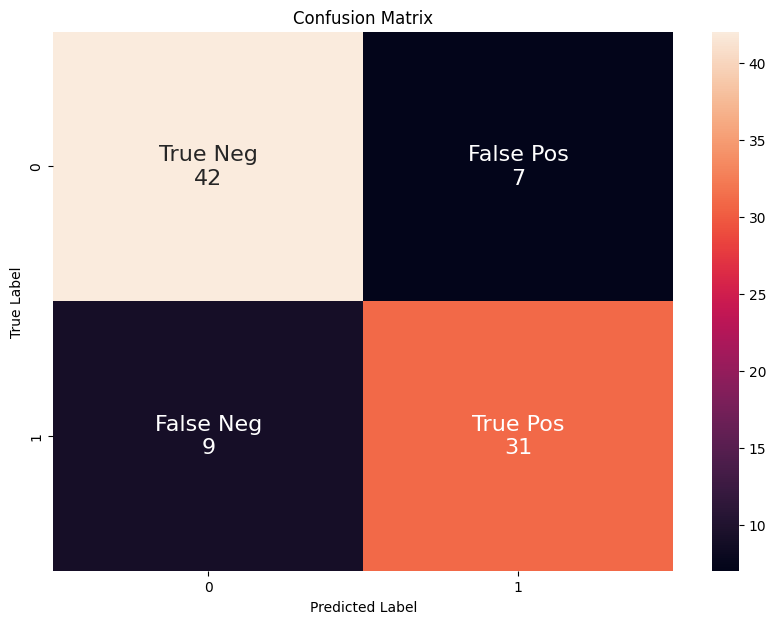

In [60]:
# creating confusion matrix heatmap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(Y_test, knn_Y_pred)
fig = plt.figure(figsize=(10,7))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree

In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, Y_test)
decision_tree_accuracy

0.898876404494382

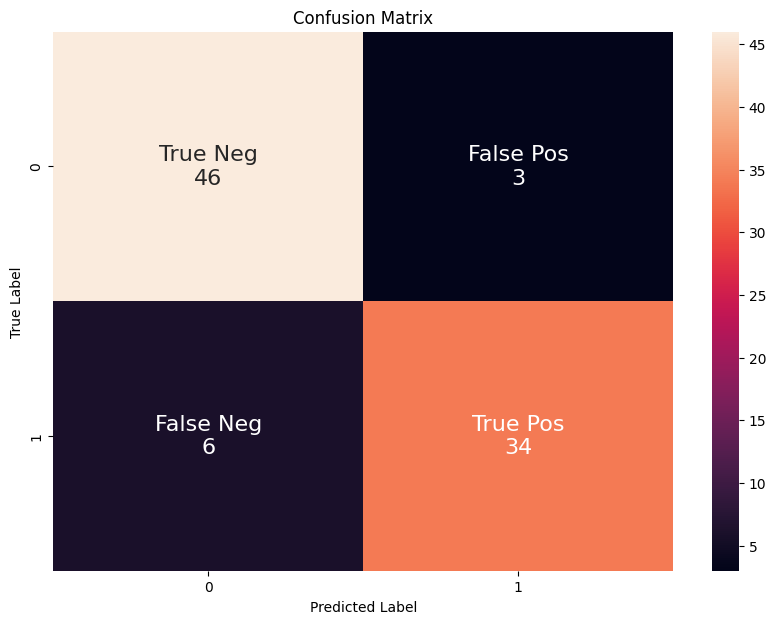

In [62]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, decision_tree_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM

In [63]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_test, Y_test)
svc_accuracy

0.8876404494382022

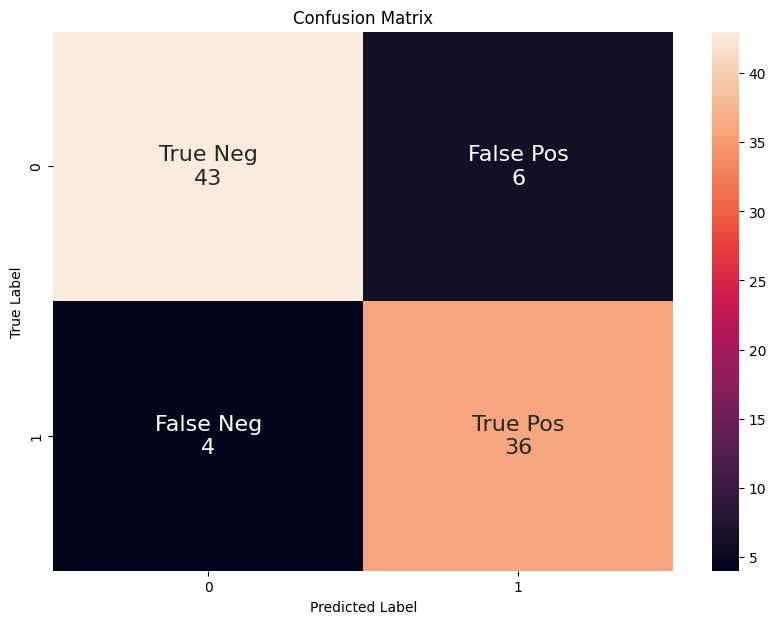

In [64]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, svm_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

0.9438202247191011

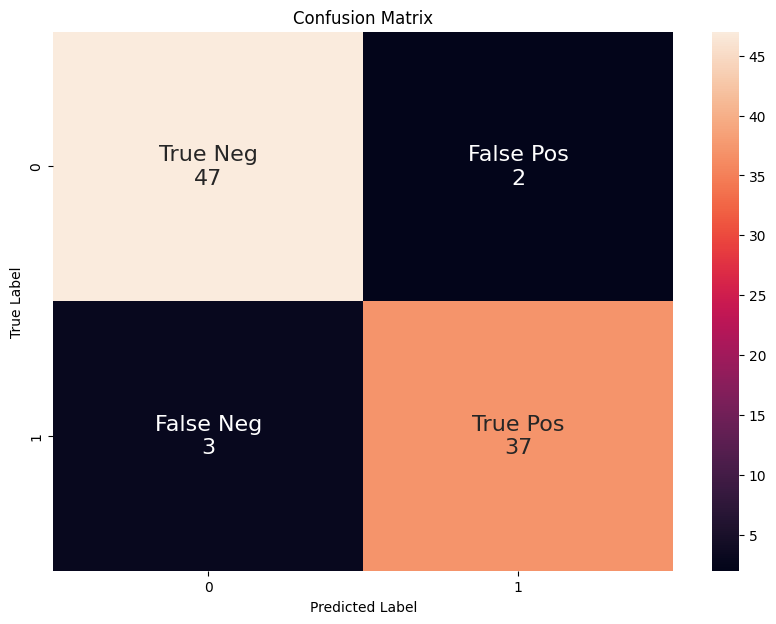

In [66]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_test, Y_test)
gaussian_accuracy

0.8314606741573034

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
lg_Y_pred = lg.predict(X_test)
lg_accuracy = lg.score(X_test, Y_test)
lg_accuracy

0.8089887640449438

# Single Input Predictions

In [69]:
print(Y_test.index)  # Check available indices

Index([145,  50,  67, 136,  65,  41,  55, 144, 201,  63, 115, 203, 179,  30,
       159, 175,  42,  93,   1,  97,  41, 173, 123, 188, 194, 108, 131, 127,
        68, 165,  35,  34,  88,  53,  72,  82,  18, 106,  56,  42,   3,  91,
        87, 190, 105,  62, 195,  21, 135, 186,  12, 198, 205,  20,   9,  25,
       206, 117, 169, 129, 134,   5, 194, 158, 159, 147, 137, 103, 157, 110,
       200,  18,  98, 173, 180,  17,  27, 198, 155,  32,  95,  91, 194,   5,
        58, 170, 194, 171, 196],
      dtype='int64')


In [70]:
X_test

array([[ 0.68075117,  0.        ,  1.02978723,  0.47215815,  0.51829268,
         0.        ,  0.45286195,  0.        ,  0.45052474],
       [ 0.23474178,  1.        ,  0.72765957,  0.59637562,  0.44878049,
         0.        ,  0.30555556,  0.        ,  0.44115442],
       [ 0.31455399,  0.        ,  0.8493617 ,  0.68369028,  0.41463415,
         0.        ,  0.38362795,  1.        ,  0.36656672],
       [ 0.63849765,  1.        ,  0.12765957,  0.36243822,  0.34146341,
         0.        ,  0.57912458,  1.        ,  0.38868066],
       [ 0.30516432,  0.        ,  0.27659574,  0.16474465,  0.17073171,
         0.        ,  0.82512626,  0.        ,  0.22076462],
       [ 0.19248826,  1.        ,  0.70212766,  0.43097199,  0.36585366,
         1.        ,  0.30555556,  0.        ,  0.69527736],
       [ 0.25821596,  0.        ,  0.41276596,  0.48764415,  0.36585366,
         0.        ,  0.43181818,  0.        ,  0.05622189],
       [ 0.67605634,  0.        ,  0.23404255,  0.21416804,  0

In [74]:
print("Predicted Class :",random_forest.predict(X_test[10].reshape(1,-1))[0])
print("Actual Class:", Y_test.iloc[10])

Predicted Class : 1
Actual Class: 1


In [73]:
print("Predicted Class :",random_forest.predict(X_test[50].reshape(1,-1))[0])
print("Actual Class:", Y_test.iloc[50])

Predicted Class : 0
Actual Class: 0


# Predictive system

In [75]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
    'sl_no': [sl_no],
    'gender': [gender],
    'ssc_p': [ssc_p],
    'hsc_p': [hsc_p],
    'degree_p': [degree_p],
    'workex': [workex],
    'etest_p': [etest_p],
    'specialisation': [specialisation],
    'mba_p': [mba_p]
    }
    data = pd.DataFrame(data)
    data['gender'] = data['gender'].map({'M':1,"F":0})
    data['workex'] = data['workex'].map({"Yes":1,"No":0})
    data['specialisation'] = data['specialisation'].map({"Mkt&HR":1,"Mkt&Fin":0})
    scaled_df = scaler.fit_transform(data)
    result = random_forest.predict(scaled_df).reshape(1, -1)
    return result[0]

In [76]:
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('place')

else:
    print('not place')

not place


# Save Files

In [78]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))